# Laporan Praktikum Modul II: Fast Fourier Transform dan Filtering Frekuensi

## Praktikum ANDAT II 2017

## Kelompok 2: Resty Riany Muslim 12814005 - Anugrah Noer Hadi 12814023 - Prana Kesuma Suseno 12814025 - Nurhayuni Dwi Arini 12814028 - Hana Camelia 12814035

I. Pendahuluan

a. DFT (Discrete Fourier Transform)

Transformasi Fourier Diskrit (Discrete Fourier Transform - DFT) adalah prosedur yang paling umum dan kuat pada bidang pemrosesan sinyal digital. DFT memungkinkan untuk menganalisis, memanipulasi, dan mensintesis sinyal  dengan cara yang tidak mungkin dilakukan dalam pemrosesan sinyal analog. (Lyons, Richard G. 1997. Understanding Digital Signal Processing. Prentice Hall PTR)
Discrete Fourier Transform (DFT) merupakan model transformasi fourier yang dikenakan pada fungsi diskrit, dan hasilnya juga diskrit.
DFT menjadi prosedur matematika yang digunakan untuk menentukan harmonik atau frekuensi yang merupakan isi dari urutan nilai yang diperoleh dari sampling periodik sinyal kontinu dalam domain waktu atau disebut urutan sinyal diskrit.
Invers DFT (IDFT) menghitung kembali representasi sinyal waktu diskrit x(n) dari sinyal yang dinyatakan dalam domain frekuensi X(w).  
Meskipun DFT memainkan peranan yang penting sebagai prosedur matematis untuk menentukan isi frekuensi dari urutan domain waktu, namun sangat tidak efisien. Jumlah titik dalam DFT meningkat menjadi ratusan atau ribuan, sehingga jumlah- jumlah yang dihitung menjadi tidak dapat ditentukan. 

b. FFT (Fast Fourier Transform)

Fast Fourier Transform adalah suatu algoritma yang digunakan untuk merepresentasikan sinyal dalam domain waktu diskrit dan domain frekuensi atau untuk menghitung DFT dengan cepat dan efisien. FFT merupakan turunan dari persamaan DFT dimana jumlah perhitungan digital pada DFT dapat dikurangi secara significant sehingga dengan adanya penemuan FFT maka perhitungan digital terhadap spektrum-spektrum frekuensi dapat diwujudkan secara sederhana. Teknik FFT digunakan untuk mengekstrak komponen-komponen data pada domain spektral atau frekuensi, dimana pada domain spasial ataupun domain waktu komponen-komponen tersebut tidak dapat terlihat secara eksplisit. Selain itu, FFT dalam aplikasinya dapat menghasilkan citra digital yang tidak jauh berbeda dengan aslinya dan data yang disisipkan lebih kuat terhadap noise (gangguan).


II. Data dan Metodologi

a. Penjelasan tentang Data yang Digunakan

Data yang kami gunakan adalah data Stasiun Denpasar, Ngurah Rai selama 5 tahun yaitu tahun 2012, 2013, 2014, 2015, dan 2016. Data yang diambil adalah data temperatur dan titik embun. Tetapi digunakan pula data tekanan untuk untuk perhitungan RH.
    
b. Langkah Pengerjaan

1. Buka file excel yang berisi data stasiun yang telah dirapihkan melalui Jupyter notebook.
2. Membuat bentuk data T, Td, dan P dalam bentuk array.
3. Menormalisasi data T dan Td.
4. Menghitung RH dengan bantuan nilai T, Td, dan P dengan rumus: 

    ew=6.112*exp((17.67*Td)/(Td+243.3))
    
    es=6.112*exp((17.67*T)/(T+243.3))
    
    e=ew-(P*(T-Td)*0.00066*(1+(0.00115*Td)))
    
    RH=100*(e/es).
    
    Kemudian RH yang diperoleh dinormalisasi.
5. Melakukan FFT pada data T, Td, dan RH.
6. Memvisualisasikan hasil FFT T, Td, dan RH dengan periodogram.
7. Melakukan low filtering, high filtering, maupun bandpass filtering berdasarkan hasil periodogram sebelumnya. Dalam laporan  ini dilakukan low filtering pada titik frekuensi 1/2000 untuk melihat pengaruh tahunan, high filtering pada titik frekuensi 1/5 untuk melihat pengaruh setengah harian, dan bandpass filtering pada titik frekuensi 1/10 untuk melihat pengaruh harian.
8. Setelah dilakukan low filtering, high filtering, dan bandpass filtering dilakukan FFT terhadap hasil yang diperoleh.
9. Memplot periodogram hasil FFT ketiga filtering.
10. Memplot time series hasil FFT ketiga filtering.
11. Melakukan perbandingan dan analisis dari hasil yang plot yang diperoleh. Hasi plot RH digunakan sebagai perbandingan terhadap hasil plot T dan Td.

In [1]:
import xlrd 
from math import *
from numpy import *
from pylab import *
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from numpy.fft import fftfreq
from scipy.fftpack import *

from scipy.signal import butter, filtfilt , freqz

In [2]:
wb = xlrd.open_workbook('data gabungan.xlsx') #Buka data
sheet_data = wb.sheet_by_index(0) #Baca data dari nol
T = array(sheet_data.col_values(2,1)) #Baca data kolom ke 3 dari baris ke 2
Td = array(sheet_data.col_values(3,1)) #Buca data kolom ke 4 (D) dar baris ke3
P = array(sheet_data.col_values(5,1))  #Buca data kolom ke 10  dar baris ke3 

In [3]:
#Normalisasi data T
Tstd=np.nanstd(T)
Tbar=np.nanmean(T)
T=(T-Tbar)/Tstd 

#Normalisasi data Td
Tdstd=np.nanstd(Td)
Tdbar=np.nanmean(Td)
Td=(Td-Tdbar)/Tdstd 

In [4]:
#Menghitung RH
ew=6.112*exp((17.67*Td)/(Td+243.3))
es=6.112*exp((17.67*T)/(T+243.3))
e=ew-(P*(T-Td)*0.00066*(1+(0.00115*Td)))
RH=100*(e/es)

#Normalisasi data RH
RHstd=np.nanstd(RH)
RHbar=np.nanmean(RH)
RH=(RH-RHbar)/RHstd

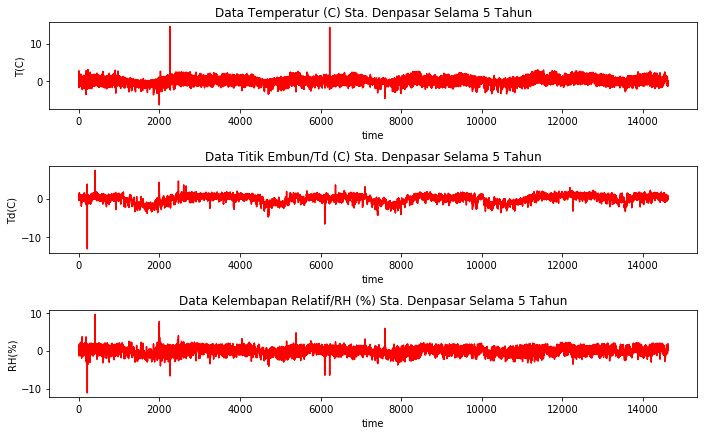

In [5]:
#visualisasi data
fig1 = plt.figure()
axRH = fig1.add_axes([0, 0, 1.5, 0.3]) 
axTd = fig1.add_axes([0, 0.5, 1.5, 0.3])
axT = fig1.add_axes([0, 1, 1.5, 0.3])

axRH.plot(RH, 'r')
axRH.set_xlabel('time')
axRH.set_ylabel('RH(%)')
axRH.set_title('Data Kelembapan Relatif/RH (%) Sta. Denpasar Selama 5 Tahun')

axTd.plot(Td, 'r')
axTd.set_xlabel('time')
axTd.set_ylabel('Td(C)')
axTd.set_title('Data Titik Embun/Td (C) Sta. Denpasar Selama 5 Tahun')

axT.plot(T, 'r')
axT.set_xlabel('time')
axT.set_ylabel('T(C)')
axT.set_title('Data Temperatur (C) Sta. Denpasar Selama 5 Tahun')

fig1

In [6]:
#Melakukan FFT pada data
t=np.linspace(1, 14616, 14616)
Nt=len(T)
Ntd=len(Td)
Nrh=len(RH)

#pada data T
dt= t[1]-t[0] # jarak antara dua sample data, misalnya per 3 jam, hari, atau bulan
Ft = fft(T)  # melakukan FFT pada data
wt = fftfreq(Nt, dt) # menghitung frekuensi sample, satuannya akan mengikuti nilai dt 
Tt = Nt/t[0:7307] # jumlah jenis periode dari sinyal pembangun adalah setengah dari jumlah panjang data

indices = where(wt > 0) # hanya mengambil frekuensi sample yang positif
wt_pos = wt[indices]
Ft_pos = Ft[indices]

#pada data Td
dtd= t[1]-t[0] # jarak antara dua sample data, misalnya per 3 jam, hari, atau bulan
Ftd = fft(Td)  # melakukan FFT pada data
wtd = fftfreq(Ntd, dtd) # menghitung frekuensi sample, satuannya akan mengikuti nilai dt 
Ttd = Ntd/t[0:7307] # jumlah jenis periode dari sinyal pembangun adalah setengah dari jumlah panjang data

indices = where(wtd > 0) # hanya mengambil frekuensi sample yang positif
wtd_pos = wtd[indices]
Ftd_pos = Ftd[indices]

#pada data RH
drh= t[1]-t[0] # jarak antara dua sample data, misalnya per 3 jam, hari, atau bulan
Frh = fft(RH)  # melakukan FFT pada data
wrh = fftfreq(Nrh, drh) # menghitung frekuensi sample, satuannya akan mengikuti nilai dt 
Trh = Nrh/t[0:7307] # jumlah jenis periode dari sinyal pembangun adalah setengah dari jumlah panjang data

indices = where(wrh > 0) # hanya mengambil frekuensi sample yang positif
wrh_pos = wrh[indices]
Frh_pos = Frh[indices]

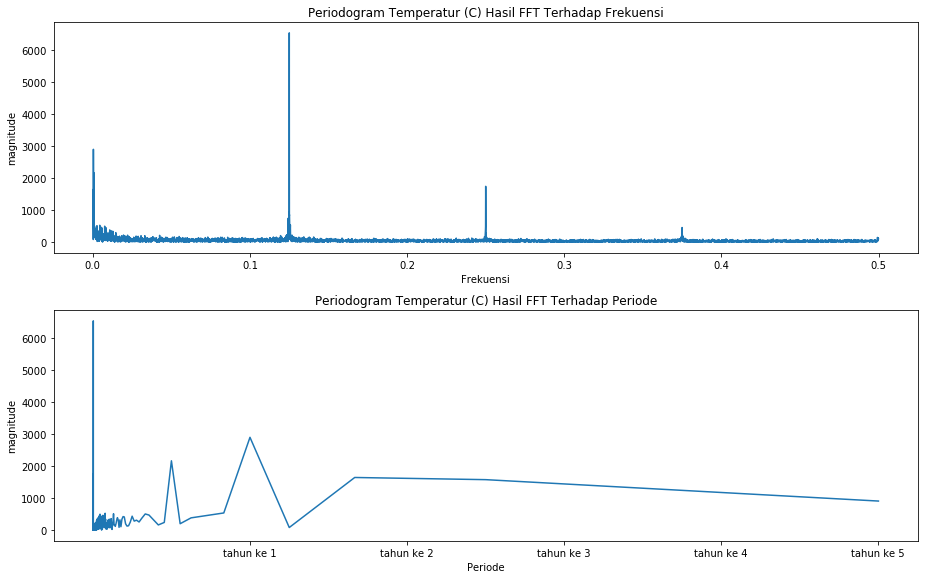

In [7]:
#Visualisasi data hasil FFT
#Temperatur/T
fig2 = plt.figure()
ax = fig2.add_axes([0, 0, 2, 0.8])
axFt = fig2.add_axes([0, 1, 2, 0.8])

axFt.plot(wt_pos, abs(Ft_pos))
axFt.set_xlabel('Frekuensi')
axFt.set_ylabel('magnitude')
axFt.set_title('Periodogram Temperatur (C) Hasil FFT Terhadap Frekuensi')
#axFt.set_xticks([1/15, 0.1, 0.2, 0.3, 0.4, 0.5])

ax.plot(Tt, abs(Ft_pos))
ax.set_xlabel('Periode')
ax.set_ylabel('magnitude')
ax.set_title('Periodogram Temperatur (C) Hasil FFT Terhadap Periode')
ax.set_xticks([2920, 5840, 8760,  11680, 14600])
ax.set_xticklabels(['tahun ke 1', 'tahun ke 2' , 'tahun ke 3' , 'tahun ke 4' , 'tahun ke 5'])
#ax.set_xlim([1400, 1800])

fig2

Analisis:
Pada grafik diatas, ditunjukan Periodogram Temperatur hasil FFT terhadap frekuensi dan terhadap periode. Dapat dilihat pada grafik kedua, sinyal dengan amplitudo paling besar ada pada periode tahunan.

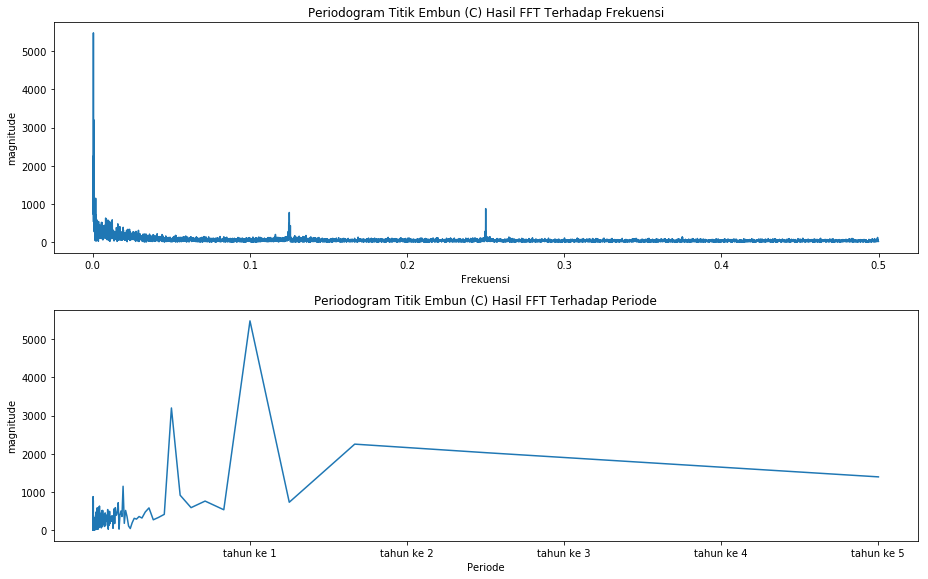

In [8]:
#Visualisasi data hasil FFT
#Titik Embun/Td
fig3 = plt.figure()
axtd = fig3.add_axes([0, 0, 2, 0.8])
axFtd = fig3.add_axes([0, 1, 2, 0.8])

axFtd.plot(wtd_pos, abs(Ftd_pos))
axFtd.set_xlabel('Frekuensi')
axFtd.set_ylabel('magnitude')
axFtd.set_title('Periodogram Titik Embun (C) Hasil FFT Terhadap Frekuensi')
#axFtd.set_xticks([1/15, 0.1, 0.2, 0.3, 0.4, 0.5])

axtd.plot(Ttd, abs(Ftd_pos))
axtd.set_xlabel('Periode')
axtd.set_ylabel('magnitude')
axtd.set_title('Periodogram Titik Embun (C) Hasil FFT Terhadap Periode')

#ax.set_xlim([1500, 1900])
axtd.set_xticks([2920, 5840, 8760,  11680, 14600])
axtd.set_xticklabels(['tahun ke 1', 'tahun ke 2' , 'tahun ke 3' , 'tahun ke 4' , 'tahun ke 5'])

fig3

Analisis:
Pada grafik diatas, ditunjukan Periodogram Titik Embun hasil FFT terhadap frekuensi dan terhadap periode. Dapat dilihat pada grafik kedua, sinyal dengan amplido paling besar ada pada periode tahunan (monsun)

Low Filtering Temperatur dan Titik Embun

In [9]:
#Melakukan low Filtering pada Temperatur
fst=1                                 # nilai frekuensi sample, sesuai dengan satuan data misal,  1/3jam, 1/hari, 1/bulan
cutofft = 1/2000 #periode harian                          # cutoff frequency, titik pemotongan dalam satuan yang kita pakai seperti di atas
nyqt=0.5*fst                                            # nyquist merupakan frekuensi terbesar dari jenis sinyal pembangun
normal_cutofft = cutofft/ nyqt                                              # titik pemotongan dalam satuan pi radian/sekon
ordert = 5                                                                            # tingkat filtering yang diinginkan
bt, at = butter(ordert, normal_cutofft, btype='low', analog=False)                                 # metode filtering butter
Tfiltlow = filtfilt(bt, at, T, padlen=None)                                            # data time series setelah difilter

#Melakukan low Filtering pada Titik Embun
fstd=1                                 # nilai frekuensi sample, sesuai dengan satuan data misal,  1/3jam, 1/hari, 1/bulan
cutofftd = 1/2000                         # cutoff frequency, titik pemotongan dalam satuan yang kita pakai seperti di atas
nyqtd=0.5*fstd                                            # nyquist merupakan frekuensi terbesar dari jenis sinyal pembangun
normal_cutofftd = cutofftd/ nyqtd                                              # titik pemotongan dalam satuan pi radian/sekon
ordertd = 5                                                                            # tingkat filtering yang diinginkan
btd, atd = butter(ordertd, normal_cutofftd, btype='low', analog=False)                                 # metode filtering butter
Tdfiltlow = filtfilt(btd, atd, Td, padlen=None)                                            # data time series setelah difilter

#Melakukan FFT pada hasil Lowpass Filtering Temperatur
Ffiltlowt = fft(Tfiltlow) # FFT data hasil Lowpass Filtering
wfiltlowt = fftfreq(Nt, dt) # Mengambil frekuensi sample
Tt = Nt/t[0:7307]

indices = where(wfiltlowt > 0) # select only indices for elements that corresponds to positive frequencies
wt_posfilow = wfiltlowt[indices]
Ft_posfilow = Ffiltlowt[indices]

#Melakukan FFT pada hasil Lowpass Filtering Titik Embun
Ffiltlowtd = fft(Tdfiltlow) # FFT data hasil Lowpass Filtering
wfiltlowtd = fftfreq(Ntd, dtd) # Mengambil frekuensi sample
Ttd = Ntd/t[0:7307]

indices = where(wfiltlowtd > 0) # select only indices for elements that corresponds to positive frequencies
wtd_posfilow = wfiltlowtd[indices]
Ftd_posfilow = Ffiltlowtd[indices]

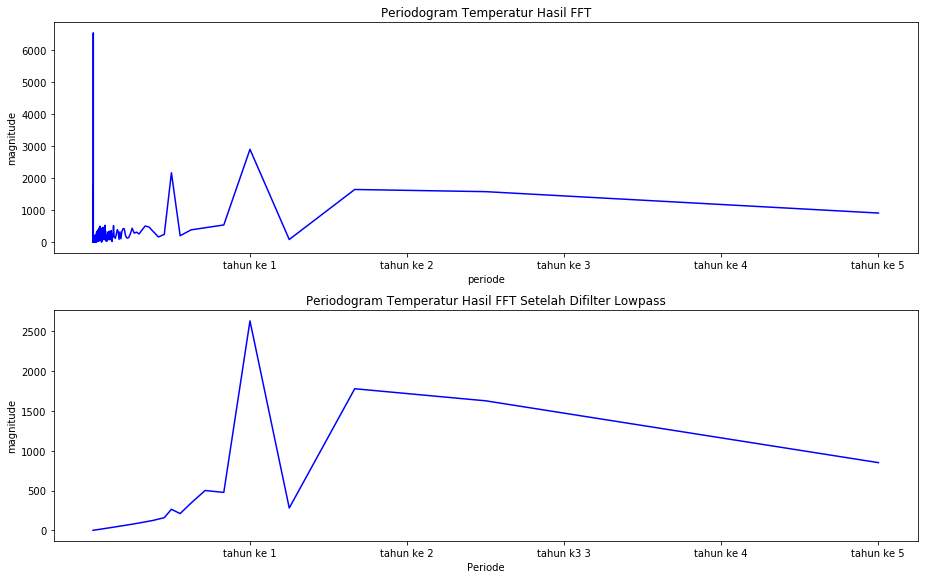

In [10]:
#Plot periodogrm hasil FFT pada lowpass Filtering Temperatur
fig4 = plt.figure()
axT = fig4.add_axes([0, 0, 2, 0.8])
axFt = fig4.add_axes([0, 1, 2, 0.8])

axFt.plot(Tt, abs(Ft_pos), 'b')
axFt.set_xlabel('periode')
axFt.set_ylabel('magnitude')
axFt.set_title('Periodogram Temperatur Hasil FFT')
#axFt.set_xticks([5, 10, 15,  20, 25, 30, 35])
#axT.set_xlim([0, 60])
axFt.set_xticks([2920, 5840, 8760,  11680, 14600])
axFt.set_xticklabels(['tahun ke 1', 'tahun ke 2' , 'tahun ke 3' , 'tahun ke 4' , 'tahun ke 5'])


axT.plot(Tt, abs(Ft_posfilow), 'b')
axT.set_xlabel('Periode')
axT.set_ylabel('magnitude')
axT.set_title('Periodogram Temperatur Hasil FFT Setelah Difilter Lowpass')

axT.set_xticks([2920, 5840, 8760,  11680, 14600])
axT.set_xticklabels(['tahun ke 1', 'tahun ke 2' , 'tahun k3 3' , 'tahun ke 4' , 'tahun ke 5'])

fig4

Analisis:
Dari hasil grafik diatas, grafik pertama merupakan grafik periodogram temperatur hasil FFT dan grafik kedua merupakan grafik periogdogram temperatur hasil FFT setelah dilakukan lowpass filtering untuk mendapatkan pola data tahunan. Dari grafik kedua, dapat dilihat setelah dilakukan lowpass filtering untuk data tahunan masih terdapat pengaruh dari data dengan periode lebih dari satu tahun.  

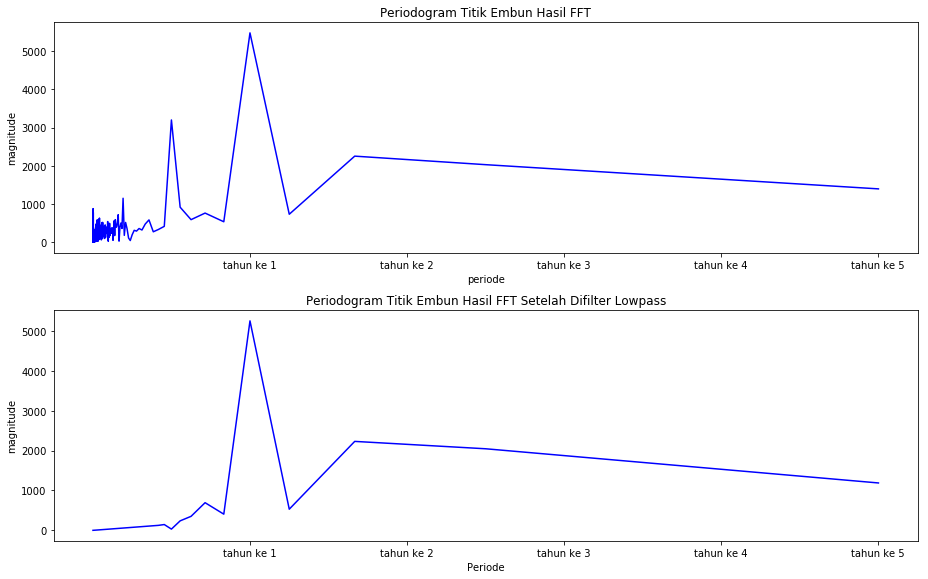

In [11]:
#Plot periodogrm hasil FFT pada lowpass Filtering Titik Embun
fig5 = plt.figure()
axTd = fig5.add_axes([0, 0, 2, 0.8])
axFtd = fig5.add_axes([0, 1, 2, 0.8])

axFtd.plot(Ttd, abs(Ftd_pos), 'b')
axFtd.set_xlabel('periode')
axFtd.set_ylabel('magnitude')
axFtd.set_title('Periodogram Titik Embun Hasil FFT')

axFtd.set_xticks([2920, 5840, 8760,  11680, 14600])
axFtd.set_xticklabels(['tahun ke 1', 'tahun ke 2' , 'tahun ke 3' , 'tahun ke 4' , 'tahun ke 5'])
#axFtd.set_xticks([5, 10, 15,  20, 25, 30, 35])
#axTd.set_xlim([0, 60])

axTd.plot(Ttd, abs(Ftd_posfilow), 'b')
axTd.set_xlabel('Periode')
axTd.set_ylabel('magnitude')
axTd.set_title('Periodogram Titik Embun Hasil FFT Setelah Difilter Lowpass')
#axT.set_xticks([5, 10, 15,  20, 25, 30, 35])
#axT.set_xlim([0, 60])

axTd.set_xticks([2920, 5840, 8760,  11680, 14600])
axTd.set_xticklabels(['tahun ke 1', 'tahun ke 2' , 'tahun ke 3' , 'tahun ke 4' , 'tahun ke 5'])

fig5

Analisis:
Dari hasil grafik diatas, grafik pertama merupakan grafik periodogram titik embun hasil FFT dan grafik kedua merupakan grafik periogdogram titik embun hasil FFT setelah dilakukan lowpass filtering untuk mendapatkan pola data tahunan. Dari grafik kedua, dapat dilihat setelah dilakukan lowpass filtering untuk data tahunan masih terdapat pengaruh dari data dengan periode lebih dari satu tahun.

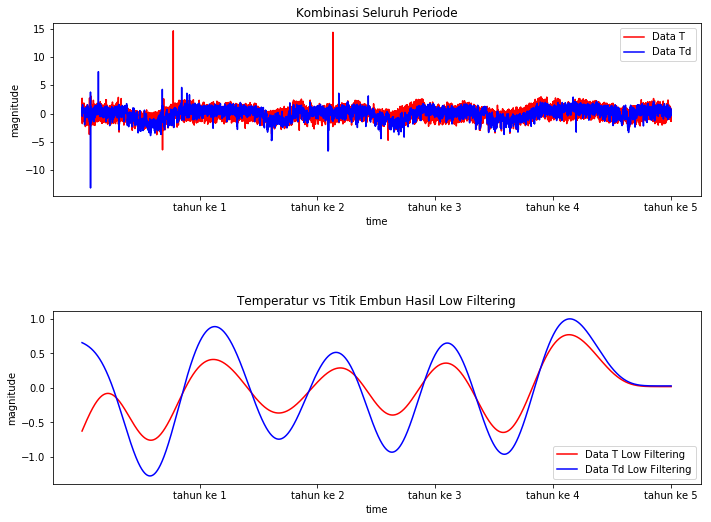

In [12]:
#Plot time series hasil Lowpass Filtering T dan Td
fig6 = plt.figure()
axTTd = fig6.add_axes([0, 1, 1.5, 0.6]) 
axTTdlow = fig6.add_axes([0, 0, 1.5, 0.6])

axTTd.plot(T, 'r')
axTTd.plot(Td, 'b')
axTTd.set_xlabel('time')
axTTd.set_ylabel('magnitude')
axTTd.set_title('Kombinasi Seluruh Periode')
axTTd.legend(["Data T", "Data Td"],loc=0)

axTTd.set_xticks([2920, 5840, 8760,  11680, 14600])
axTTd.set_xticklabels(['tahun ke 1', 'tahun ke 2' , 'tahun ke 3' , 'tahun ke 4' , 'tahun ke 5'])


axTTdlow.plot(Tfiltlow, 'r')
axTTdlow.plot(Tdfiltlow, 'b')
axTTdlow.set_xlabel('time')
axTTdlow.set_ylabel('magnitude')
axTTdlow.set_title('Temperatur vs Titik Embun Hasil Low Filtering')
axTTdlow.legend(["Data T Low Filtering", "Data Td Low Filtering"],loc=0)

axTTdlow.set_xticks([2920, 5840, 8760,  11680, 14600])
axTTdlow.set_xticklabels(['tahun ke 1', 'tahun ke 2' , 'tahun ke 3' , 'tahun ke 4' , 'tahun ke 5'])

fig6

Highpass Filtering Temperatur dan Titik Embun

In [13]:
#Melakukan High Filtering pada temperatur
fst=1 
cutofft = 1/5 #cutoff frequency
nyqt=0.5*fst
normal_cutofft = cutofft/ nyqt
order = 5
bt, at = butter(order, normal_cutofft, btype='high', analog=False)
TfiltHigh = filtfilt(bt, at, T, padlen=None)

#Melakukan High Filtering pada titik embun
fstd=1 
cutofftd = 1/5 #cutoff frequency
nyqtd=0.5*fstd
normal_cutofftd = cutofftd/ nyqtd
order = 5
btd, atd = butter(order, normal_cutofftd, btype='high', analog=False)
TdfiltHigh = filtfilt(btd, atd, Td, padlen=None)

#Melakukan FFT pada hasil Highpass Filtering temperatur
FfiltHight = fft(TfiltHigh)
wfiltHight = fftfreq(Nt, dt)
Tt = Nt/t[0:7307]

indices = where(wfiltHight > 0) # select only indices for elements that corresponds to positive frequencies
wt_posfiHigh = wfiltHight[indices]
Ft_posfiHigh = FfiltHight[indices]

#Melakukan FFT pada hasil Highpass Filtering titik embun
FfiltHightd = fft(TdfiltHigh)
wfiltHightd = fftfreq(Ntd, dtd)
Ttd = Ntd/t[0:7307]

indices = where(wfiltHightd > 0) # select only indices for elements that corresponds to positive frequencies
wtd_posfiHigh = wfiltHightd[indices]
Ftd_posfiHigh = FfiltHightd[indices]

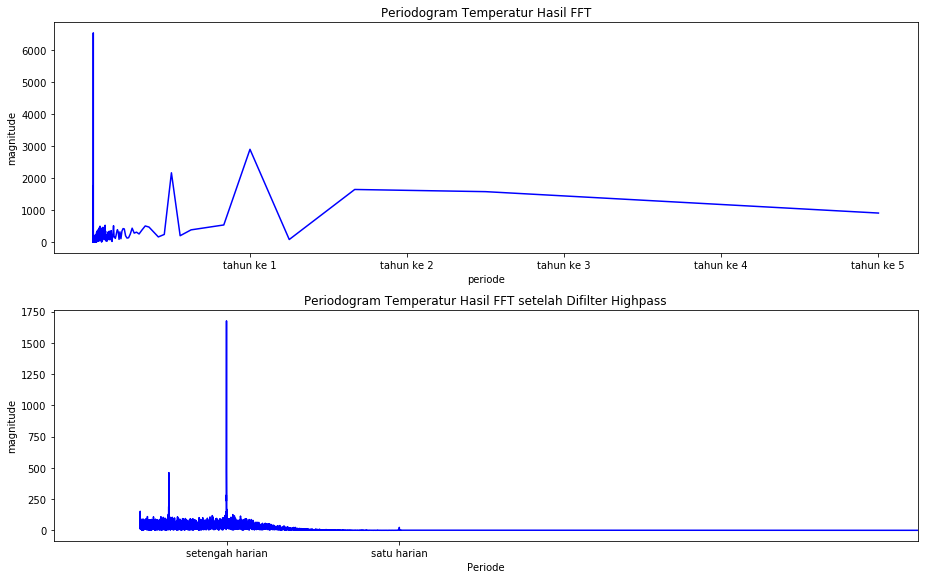

In [14]:
#Plot periodogram hasil FFT Highpass Filtering Temperatur
fig7 = plt.figure()
axT= fig7.add_axes([0, 0, 2, 0.8])
axFt = fig7.add_axes([0, 1, 2, 0.8])

axFt.plot(Tt, abs(Ft_pos), 'b')
axFt.set_xlabel('periode')
axFt.set_ylabel('magnitude')
axFt.set_title('Periodogram Temperatur Hasil FFT')
#axFt.set_xticks([5, 10, 15,  20, 25, 30, 35])
#axT.set_xlim([0, 60])

axFt.set_xticks([2920, 5840, 8760,  11680, 14600])
axFt.set_xticklabels(['tahun ke 1', 'tahun ke 2' , 'tahun ke 3' , 'tahun ke 4' , 'tahun ke 5'])


axT.plot(Tt, abs(Ft_posfiHigh), 'b')
axT.set_xlabel('Periode')
axT.set_ylabel('magnitude')
axT.set_title('Periodogram Temperatur Hasil FFT setelah Difilter Highpass')
#axT.set_xticks([5, 10, 15,  20, 25, 30, 35])
axT.set_xlim([0, 20])
axT.set_xticks([4, 8])
axT.set_xticklabels(['setengah harian','satu harian'])
fig7

Analisis:
Dari hasil grafik diatas, grafik pertama merupakan grafik periodogram dew point hasil FFT dan grafik kedua merupakan grafik periodogram dew point hasil FFT setelah dilakukan highpass filtering untuk mendapatkan pola data setengah harian. 

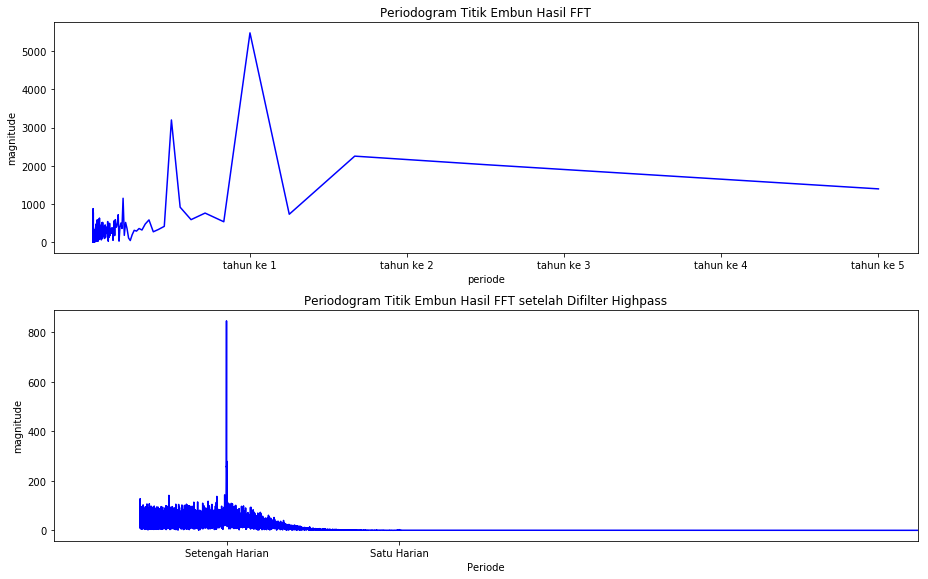

In [15]:
#Plot periodogram hasil FFT Highpass Filtering Titik Embun
fig8 = plt.figure()
axTd = fig8.add_axes([0, 0, 2, 0.8])
axFtd = fig8.add_axes([0, 1, 2, 0.8])

axFtd.plot(Ttd, abs(Ftd_pos), 'b')
axFtd.set_xlabel('periode')
axFtd.set_ylabel('magnitude')
axFtd.set_title('Periodogram Titik Embun Hasil FFT')
#axFtd.set_xticks([5, 10, 15,  20, 25, 30, 35])
#axTd.set_xlim([0, 60])
axFtd.set_xticks([2920, 5840, 8760,  11680, 14600])
axFtd.set_xticklabels(['tahun ke 1', 'tahun ke 2' , 'tahun ke 3' , 'tahun ke 4' , 'tahun ke 5'])

axTd.plot(Ttd, abs(Ftd_posfiHigh), 'b')
axTd.set_xlabel('Periode')
axTd.set_ylabel('magnitude')
axTd.set_title('Periodogram Titik Embun Hasil FFT setelah Difilter Highpass')
#axTd.set_xticks([5, 10, 15,  20, 25, 30, 35])
axTd.set_xlim([0, 20])
axTd.set_xticks([4, 8])
axTd.set_xticklabels(['Setengah Harian', 'Satu Harian'])
fig8

Analisis:
Dari hasil grafik diatas, grafik pertama merupakan grafik periodogram dew point hasil FFT dan grafik kedua merupakan grafik periodogram dew point hasil FFT setelah dilakukan highpass filtering untuk mendapatkan pola data setengah harian.

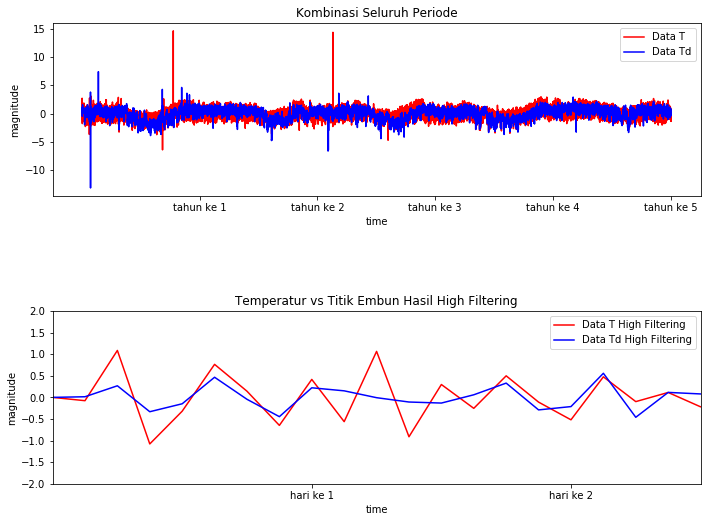

In [16]:
#Plot time series hasil Highpass Filtering T dan Td
fig9 = plt.figure()
axTTd = fig9.add_axes([0, 1, 1.5, 0.6]) 
axTTdhigh = fig9.add_axes([0, 0, 1.5, 0.6])

axTTd.plot(T, 'r')
axTTd.plot(Td, 'b')
axTTd.set_xlabel('time')
axTTd.set_ylabel('magnitude')
axTTd.set_title('Kombinasi Seluruh Periode')
axTTd.legend(["Data T", "Data Td"],loc=0)

axTTd.set_xticks([2920, 5840, 8760,  11680, 14600])
axTTd.set_xticklabels(['tahun ke 1', 'tahun ke 2' , 'tahun ke 3' , 'tahun ke 4' , 'tahun ke 5'])

axTTdhigh.plot(TfiltHigh, 'r')
axTTdhigh.plot(TdfiltHigh, 'b')
axTTdhigh.set_xlabel('time')
axTTdhigh.set_ylabel('magnitude')
axTTdhigh.set_title('Temperatur vs Titik Embun Hasil High Filtering')
axTTdhigh.legend(["Data T High Filtering", "Data Td High Filtering"],loc=0)
axTTdhigh.set_xlim([0, 20])
axTTdhigh.set_ylim([-2, 2])
axTTdhigh.set_xticks([8,16])
axTTdhigh.set_xticklabels(['hari ke 1', 'hari ke 2'])

fig9

Bandpass Filtering Temperatur dan Titik Embun

In [17]:
#Melakukan Bandpass Filtering pada temperatur
fst=1 
cutofft = np.array([1/9,1/5]) # terdapat dua nilai cut off, karena ingin di filter pada band tertentu
nyqt=0.5*fst
normal_cutofft = cutofft/ nyqt
order = 2
bt, at = butter(order, normal_cutofft, btype='bandpass', analog=False)
Tfiltband = filtfilt(bt, at, T, padlen=None)

#Melakukan Bandpass Filtering pada titik embun
fstd=1 
cutofftd = np.array([1/9,1/5]) # terdapat dua nilai cut off, karena ingin di filter pada band tertentu
nyqtd=0.5*fstd
normal_cutofftd = cutofftd/ nyqtd
order = 2
btd, atd = butter(order, normal_cutofftd, btype='bandpass', analog=False)
Tdfiltband = filtfilt(btd, atd, Td, padlen=None)

#Melakukan FFT pada hasil Bandpass Filtering temperatur
Ffiltbandt = fft(Tfiltband)
wfiltbandt = fftfreq(Nt, dt)
Tt = Nt/t[0:7307]

indices = where(wfiltbandt > 0) # select only indices for elements that corresponds to positive frequencies
wt_posfiband = wfiltbandt[indices]
Ft_posfiband= Ffiltbandt[indices]

#Melakukan FFT pada hasil Bandpass Filtering titik embun
Ffiltbandtd = fft(Tdfiltband)
wfiltbandtd = fftfreq(Ntd, dtd)
Ttd = Ntd/t[0:7307]

indices = where(wfiltbandtd > 0) # select only indices for elements that corresponds to positive frequencies
wtd_posfiband = wfiltbandtd[indices]
Ftd_posfiband= Ffiltbandtd[indices]

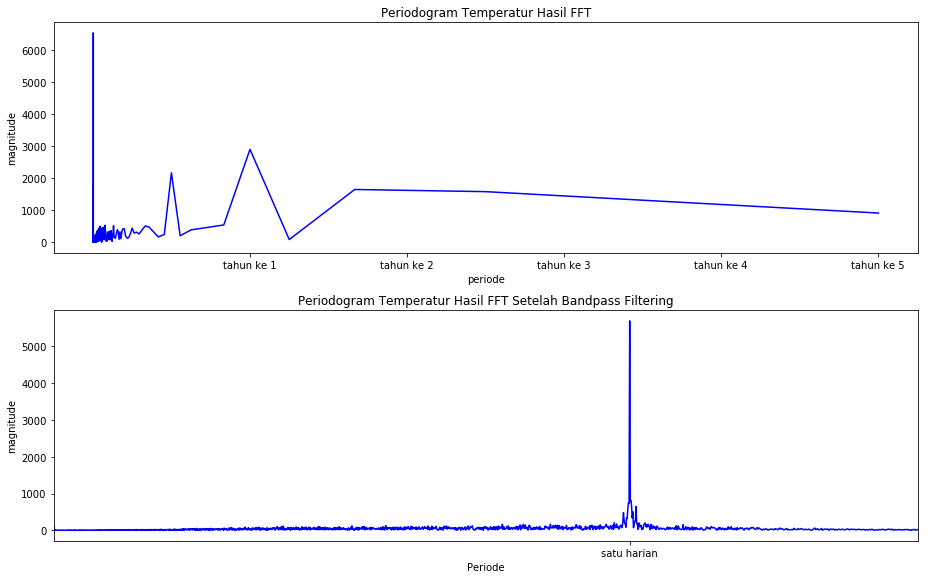

In [18]:
#Plot periodogram hasil FFT Bandpass Filtering temperatur
fig10 = plt.figure()
axT = fig10.add_axes([0, 0, 2, 0.8])
axFt = fig10.add_axes([0, 1, 2, 0.8])

axFt.plot(Tt, abs(Ft_pos), 'b')
axFt.set_xlabel('periode')
axFt.set_ylabel('magnitude')
axFt.set_title('Periodogram Temperatur Hasil FFT')

axFt.set_xticks([2920, 5840, 8760,  11680, 14600])
axFt.set_xticklabels(['tahun ke 1', 'tahun ke 2' , 'tahun ke 3' , 'tahun ke 4' , 'tahun ke 5'])
#axFt.set_xticks([5, 10, 15,  20, 25, 30, 35])
#axT.set_xlim([0, 60])

axT.plot(Tt, abs(Ft_posfiband), 'b')
axT.set_xlabel('Periode')
axT.set_ylabel('magnitude')
axT.set_title('Periodogram Temperatur Hasil FFT Setelah Bandpass Filtering')
#axT.set_xticks([5, 10, 15,  20, 25, 30, 35])
axT.set_xlim([4, 10])
axT.set_xticks([8])
axT.set_xticklabels(['satu harian'])

fig10

Analisis:
Dari hasil grafik diatas, grafik pertama merupakan grafik periodogram temperatur hasil FFT dan grafik kedua merupakan grafik periogdogram temperatur hasil FFT setelah dilakukan bandpass filtering untuk mendapatkan pola data harian. Dari grafik kedua, dapat dilihat setelah dilakukan bandpass filtering untuk data harian sudah tidak terdapat pengaruh dari data dengan periode kurang atau lebih dari satu hari. 

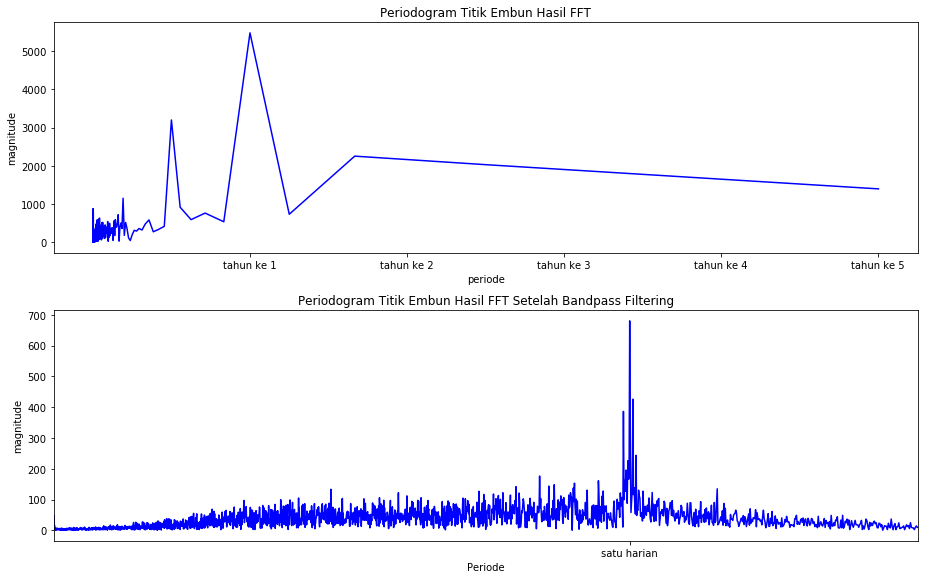

In [19]:
#Plot periodogram hasil FFT Bandpass Filtering titik embun
fig11 = plt.figure()
axTd = fig11.add_axes([0, 0, 2, 0.8])
axFtd = fig11.add_axes([0, 1, 2, 0.8])

axFtd.plot(Ttd, abs(Ftd_pos), 'b')
axFtd.set_xlabel('periode')
axFtd.set_ylabel('magnitude')
axFtd.set_title('Periodogram Titik Embun Hasil FFT')
#axFtd.set_xticks([5, 10, 15,  20, 25, 30, 35])
#axTd.set_xlim([0, 60])
axFtd.set_xticks([2920, 5840, 8760,  11680, 14600])
axFtd.set_xticklabels(['tahun ke 1', 'tahun ke 2' , 'tahun ke 3' , 'tahun ke 4' , 'tahun ke 5'])

axTd.plot(Ttd, abs(Ftd_posfiband), 'b')
axTd.set_xlabel('Periode')
axTd.set_ylabel('magnitude')
axTd.set_title('Periodogram Titik Embun Hasil FFT Setelah Bandpass Filtering')
#axTd.set_xticks([5, 10, 15,  20, 25, 30, 35])
axTd.set_xlim([4, 10])
axTd.set_xticks([8])
axTd.set_xticklabels(['satu harian'])

fig11

Analisis:
Dari hasil grafik diatas, grafik pertama merupakan grafik periodogram titik embun hasil FFT dan grafik kedua merupakan grafik periogdogram titik embun hasil FFT setelah dilakukan bandpass filtering untuk mendapatkan pola data harian. Dari grafik kedua, dapat dilihat setelah dilakukan bandpass filtering untuk data harian sudah tidak terdapat pengaruh dari data dengan periode kurang atau lebih dari satu hari. 

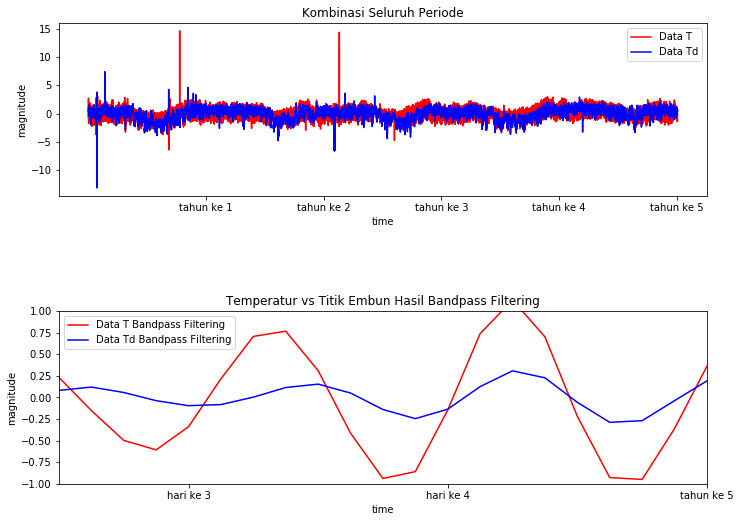

In [20]:
#Plot time series hasil Bandpass Filtering untuk T dan Td
fig12 = plt.figure()
axTTd = fig12.add_axes([0, 1, 1.5, 0.6]) 
axTTdband = fig12.add_axes([0, 0, 1.5, 0.6])

axTTd.plot(T, 'r')
axTTd.plot(Td, 'b')
axTTd.set_xlabel('time')
axTTd.set_ylabel('magnitude')
axTTd.set_title('Kombinasi Seluruh Periode')
axTTd.legend(["Data T", "Data Td"],loc=0)
axTTd.set_xticks([2920, 5840, 8760,  11680, 14600])
axTTd.set_xticklabels(['tahun ke 1', 'tahun ke 2' , 'tahun ke 3' , 'tahun ke 4' , 'tahun ke 5'])

axTTdband.plot(Tfiltband, 'r')
axTTdband.plot(Tdfiltband, 'b')
axTTdband.set_xlabel('time')
axTTdband.set_ylabel('magnitude')
axTTdband.set_title('Temperatur vs Titik Embun Hasil Bandpass Filtering')
axTTdband.legend(["Data T Bandpass Filtering", "Data Td Bandpass Filtering"],loc=0)
axTTdband.set_xlim([20, 40])
axTTdband.set_ylim([-1, 1])
axTTdband.set_xticks([24, 32, 40])
axTTdband.set_xticklabels(['hari ke 3', 'hari ke 4' , 'tahun ke 5'])
fig12

Khusus RH (Sebagai Verifikasi untuk Hasil yang Diperoleh dari Plot T dan Td)

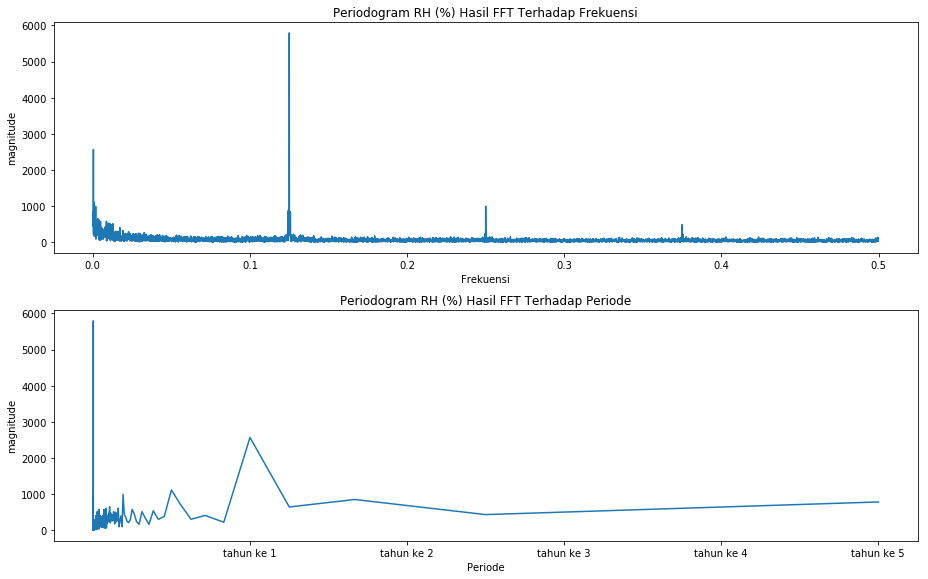

In [21]:
#Visualisasi data hasil FFT
#RH
fig13 = plt.figure()
ax = fig13.add_axes([0, 0, 2, 0.8])
axFrh = fig13.add_axes([0, 1, 2, 0.8])

axFrh.plot(wrh_pos, abs(Frh_pos))
axFrh.set_xlabel('Frekuensi')
axFrh.set_ylabel('magnitude')
axFrh.set_title('Periodogram RH (%) Hasil FFT Terhadap Frekuensi')
#axFt.set_xticks([1/15, 0.1, 0.2, 0.3, 0.4, 0.5])

ax.plot(Trh, abs(Frh_pos))
ax.set_xlabel('Periode')
ax.set_ylabel('magnitude')
ax.set_title('Periodogram RH (%) Hasil FFT Terhadap Periode')
#ax.set_xticks([5, 10, 15,  20, 25, 30, 35])
#ax.set_xlim([0, 60])

ax.set_xticks([2920, 5840, 8760,  11680, 14600])
ax.set_xticklabels(['tahun ke 1', 'tahun ke 2' , 'tahun ke 3' , 'tahun ke 4' , 'tahun ke 5'])

fig13

Analisis:
Pada grafik diatas, ditunjukan Periodogram Temperatur hasil FFT terhadap frekuensi dan terhadap periode. Dapat dilihat pada grafik kedua, sinyal dengan amplitudo paling besar ada pada periode tahunan.

Low Filtering RH

In [22]:
#Melakukan low Filtering pada RH
fsrh=1                                 # nilai frekuensi sample, sesuai dengan satuan data misal,  1/3jam, 1/hari, 1/bulan
cutoffrh = 1/2000                         # cutoff frequency, titik pemotongan dalam satuan yang kita pakai seperti di atas
nyqrh=0.5*fsrh                                          # nyquist merupakan frekuensi terbesar dari jenis sinyal pembangun
normal_cutoffrh = cutoffrh/ nyqrh                                              # titik pemotongan dalam satuan pi radian/sekon
orderrh = 5                                                                            # tingkat filtering yang diinginkan
brh, arh = butter(orderrh, normal_cutoffrh, btype='low', analog=False)                                 # metode filtering butter
RHfiltlow = filtfilt(brh, arh, RH, padlen=None)                                            # data time series setelah difilter

#Melakukan FFT pada hasil Lowpass Filtering RH
Ffiltlowrh = fft(RHfiltlow) # FFT data hasil Lowpass Filtering
wfiltlowrh = fftfreq(Nrh, drh) # Mengambil frekuensi sample
Trh = Nrh/t[0:7307]

indices = where(wfiltlowrh > 0) # select only indices for elements that corresponds to positive frequencies
wrh_posfilow = wfiltlowrh[indices]
Frh_posfilow = Ffiltlowrh[indices]

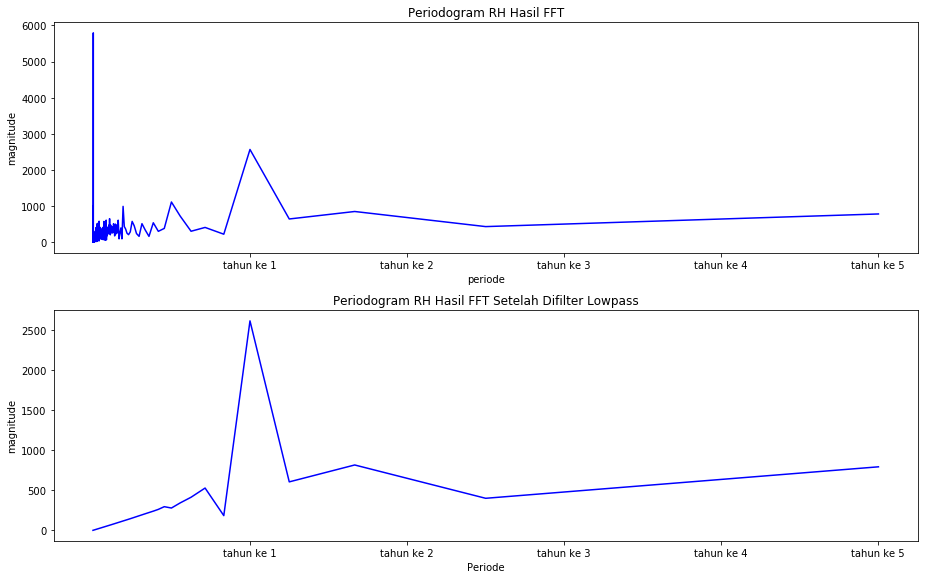

In [23]:
#Plot periodogram hasil FFT pada Lowpasss Filtering
fig14 = plt.figure()
axRH = fig14.add_axes([0, 0, 2, 0.8])
axFrh = fig14.add_axes([0, 1, 2, 0.8])

axFrh.plot(Trh, abs(Frh_pos), 'b')
axFrh.set_xlabel('periode')
axFrh.set_ylabel('magnitude')
axFrh.set_title('Periodogram RH Hasil FFT')
#axFrh.set_xticks([5, 10, 15,  20, 25, 30, 35])
#axRH.set_xlim([0, 60])

axFrh.set_xticks([2920, 5840, 8760,  11680, 14600])
axFrh.set_xticklabels(['tahun ke 1', 'tahun ke 2' , 'tahun ke 3' , 'tahun ke 4' , 'tahun ke 5'])

axRH.plot(Trh, abs(Frh_posfilow), 'b')
axRH.set_xlabel('Periode')
axRH.set_ylabel('magnitude')
axRH.set_title('Periodogram RH Hasil FFT Setelah Difilter Lowpass')
#axRH.set_xticks([5, 10, 15,  20, 25, 30, 35])
#axRH.set_xlim([0, 60])

axRH.set_xticks([2920, 5840, 8760,  11680, 14600])
axRH.set_xticklabels(['tahun ke 1', 'tahun ke 2' , 'tahun ke 3' , 'tahun ke 4' , 'tahun ke 5'])

fig14

Analisis:
Dari hasil grafik diatas, grafik pertama merupakan grafik periodogram kelembaban relatif hasil FFT dan grafik kedua merupakan grafik periogdogram kelembaban relatif hasil FFT setelah dilakukan lowpass filtering untuk mendapatkan pola data tahunan. Dari grafik kedua, dapat dilihat setelah dilakukan lowpass filtering untuk data tahunan masih terdapat pengaruh dari data dengan periode lebih dari satu tahun.  

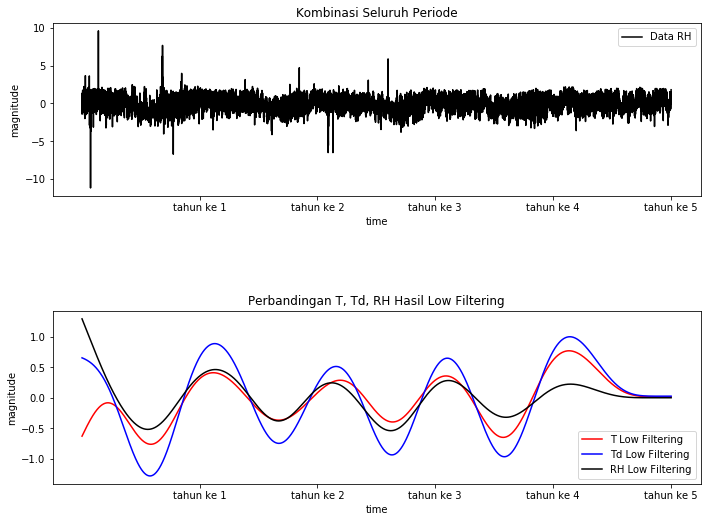

In [24]:
#Plot time series hasil Lowpass Filtering
fig15 = plt.figure()
axRH = fig15.add_axes([0, 1, 1.5, 0.6]) 
axRHlow = fig15.add_axes([0, 0, 1.5, 0.6])

axRH.plot(RH, 'k')
axRH.set_xlabel('time')
axRH.set_ylabel('magnitude')
axRH.set_title('Kombinasi Seluruh Periode')
axRH.legend(["Data RH"],loc=0)
axRH.set_xticks([2920, 5840, 8760,  11680, 14600])
axRH.set_xticklabels(['tahun ke 1', 'tahun ke 2' , 'tahun ke 3' , 'tahun ke 4' , 'tahun ke 5'])

axRHlow.plot(Tfiltlow, 'r')
axRHlow.plot(Tdfiltlow, 'b')
axRHlow.plot(RHfiltlow, 'k')
axRHlow.set_xlabel('time')
axRHlow.set_ylabel('magnitude')
axRHlow.set_title('Perbandingan T, Td, RH Hasil Low Filtering')
axRHlow.legend(["T Low Filtering", "Td Low Filtering", "RH Low Filtering"],loc=0)
axRHlow.set_xticks([2920, 5840, 8760,  11680, 14600])
axRHlow.set_xticklabels(['tahun ke 1', 'tahun ke 2' , 'tahun ke 3' , 'tahun ke 4' , 'tahun ke 5'])

fig15

Analisis:Setelah pada periodogram didapat sinyal terkuat pada periode tahunan, grafik diatas adalah time series untuk T, Td, dan RH setelah  Lowpass filtering yang ditunjukan dalam keterangan waktu per tahun.  Dapat dilihat dengan jelas bahwa terdapat pola yang jelas dan serupa pada seluruh parameter. Terdapat sinyal tinggi pada awal dan akhir tahun sedangkan mengalami penurunan pada tengah tahun. Pola tersebut kemungkinan disebabkan oleh fenomena gerak semu matahari untuk temperature dan fenomena monsun untuk RH. Pada akhir dan awal tahun, posisi matahari yang condong berada di BBS mengakibatkan BBS memiliki temperatur yang lebih tinggi. Pada tengah tahun, posisi matahari yang cenderung berada pada BBU mengakibatkan mengakibatkan BBS lebih dingin. Sedangkan, uap air dari pasifik yang bergerak ke selatan karena perbedaan tekanan atau monsun barat mengakibatkan curah hujan tinggi pada akhir dan awal tahun kemudian mempengaruhi RH sehingga mengalami peningkatan, dan sebaliknya pada tengah tahun.​


Highpass Filtering RH

In [25]:
#Melakukan High Filtering pada RH
fsrh=1 
cutoffrh = 1/5 #cutoff frequency
nyqrh=0.5*fsrh
normal_cutoffrh = cutoffrh/ nyqrh
order = 5
brh, arh = butter(order, normal_cutoffrh, btype='high', analog=False)
RHfiltHigh = filtfilt(brh, arh, RH, padlen=None)

#Melakukan FFT pada hasil Higpass Filtering RH
FfiltHighrh = fft(RHfiltHigh)
wfiltHighrh = fftfreq(Nrh, drh)
Trh = Nrh/t[0:7307]

indices = where(wfiltHighrh > 0) # select only indices for elements that corresponds to positive frequencies
wrh_posfiHigh = wfiltHighrh[indices]
Frh_posfiHigh = FfiltHighrh[indices]

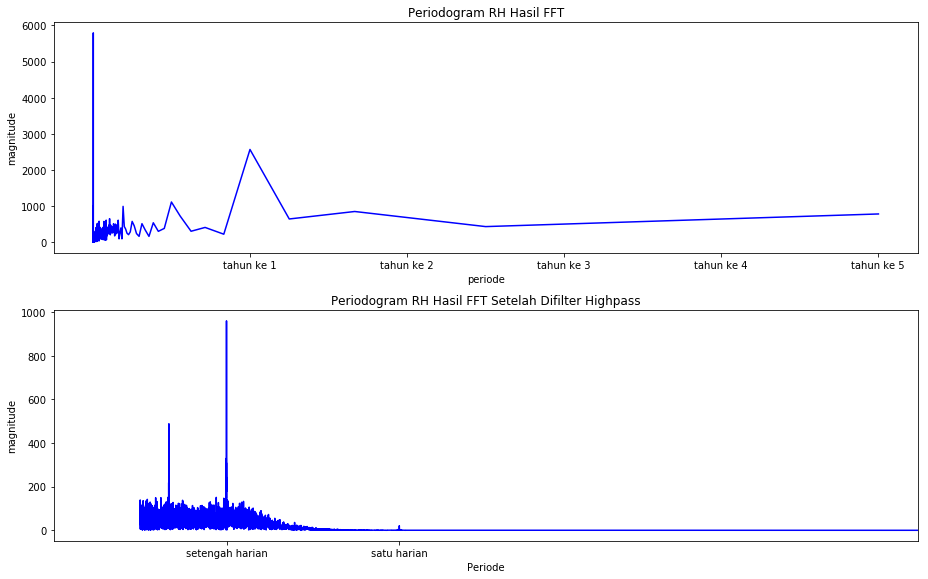

In [26]:
#Plot periodogram hasil Highpass Filtering RH
fig16 = plt.figure()
axRH = fig16.add_axes([0, 0, 2, 0.8])
axFrh = fig16.add_axes([0, 1, 2, 0.8])

axFrh.plot(Trh, abs(Frh_pos), 'b')
axFrh.set_xlabel('periode')
axFrh.set_ylabel('magnitude')
axFrh.set_title('Periodogram RH Hasil FFT')
#axFrh.set_xticks([5, 10, 15,  20, 25, 30, 35])
#axRH.set_xlim([0, 60])

axFrh.set_xticks([2920, 5840, 8760,  11680, 14600])
axFrh.set_xticklabels(['tahun ke 1', 'tahun ke 2' , 'tahun ke 3' , 'tahun ke 4' , 'tahun ke 5'])

axRH.plot(Trh, abs(Frh_posfiHigh), 'b')
axRH.set_xlabel('Periode')
axRH.set_ylabel('magnitude')
axRH.set_title('Periodogram RH Hasil FFT Setelah Difilter Highpass')
#axRH.set_xticks([5, 10, 15,  20, 25, 30, 35])
axRH.set_xlim([0, 20])

axRH.set_xticks([4,8])
axRH.set_xticklabels(['setengah harian', 'satu harian'])

fig16

Analisis:
Dari hasil grafik diatas, grafik pertama merupakan grafik periodogram kelembaban relatif hasil FFT dan grafik kedua merupakan grafik periodogram kelembaban relatif hasil FFT setelah dilakukan highpass filtering untuk mendapatkan pola data setengah harian. Dari grafik kedua, dapat dilihat setelah dilakukan highpass filtering untuk data setengah harian masih terdapat pengaruh dari data dengan periode kurang dari setengah hari.  

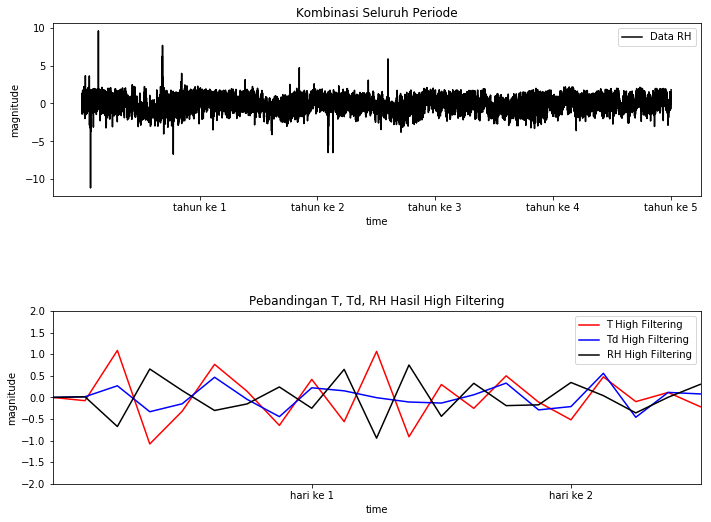

In [27]:
#Plot time series hasil Highpass Filtering
fig17 = plt.figure()
axRH = fig17.add_axes([0, 1, 1.5, 0.6]) 
axRHhigh = fig17.add_axes([0, 0, 1.5, 0.6])

axRH.plot(RH, 'k')
axRH.set_xlabel('time')
axRH.set_ylabel('magnitude')
axRH.set_title('Kombinasi Seluruh Periode')
axRH.legend(["Data RH"],loc=0)

axRH.set_xticks([2920, 5840, 8760,  11680, 14600])
axRH.set_xticklabels(['tahun ke 1', 'tahun ke 2' , 'tahun ke 3' , 'tahun ke 4' , 'tahun ke 5'])

axRHhigh.plot(TfiltHigh, 'r')
axRHhigh.plot(TdfiltHigh, 'b')
axRHhigh.plot(RHfiltHigh, 'k')
axRHhigh.set_xlabel('time')
axRHhigh.set_ylabel('magnitude')
axRHhigh.set_title('Pebandingan T, Td, RH Hasil High Filtering')
axRHhigh.legend(["T High Filtering", "Td High Filtering", "RH High Filtering"],loc=0)
axRHhigh.set_xlim([0, 20])
axRHhigh.set_ylim([-2,2 ])

axRHhigh.set_xticks([8,16])
axRHhigh.set_xticklabels(['hari ke 1', 'hari ke 2'])

fig17

Analisis:Setelah pada periodogram didapat sinyal terkuat pada periode setengah harian, grafik diatas adalah time series untuk T, Td, dan RH setelah  Highpass filtering yang ditunjukan dalam keterangan waktu per hari. Sinyal terkuat terdapat pada periode setengah harian dimungkinkan karena terjadinya sistem konvektif yang terjadi di daerah pesisir. Hal ini disebabkan karena terjadi kombinasi antara sirkulasi skala sinoptik dan local seperti dijlaskan pada paper Trilaksono dkk. 2012 atau Hadi dkk. 2006 kombinasi tersebut membentuk system konvektif yang memungkinkan terbentuknya pola semidiurnal pada temperatur (kombara. 2015)


Bandpass Filtering RH

In [28]:
#Melakukan Bandpass Filtering pada RH
fsrh=1 
cutoffrh = np.array([1/11,1/5]) # terdapat dua nilai cut off, karena ingin di filter pada band tertentu
nyqrh=0.5*fsrh
normal_cutoffrh = cutoffrh/ nyqrh
order = 5
brh, arh = butter(order, normal_cutoffrh, btype='bandpass', analog=False)
RHfiltband = filtfilt(brh, arh, RH, padlen=None)

#Melakukan FFT pada hasil Bandpass Filtering RH
Ffiltbandrh = fft(RHfiltband)
wfiltbandrh = fftfreq(Nrh, drh)
Trh = Nrh/t[0:7307]

indices = where(wfiltbandrh > 0) # select only indices for elements that corresponds to positive frequencies
wrh_posfiband = wfiltbandrh[indices]
Frh_posfiband= Ffiltbandrh[indices]

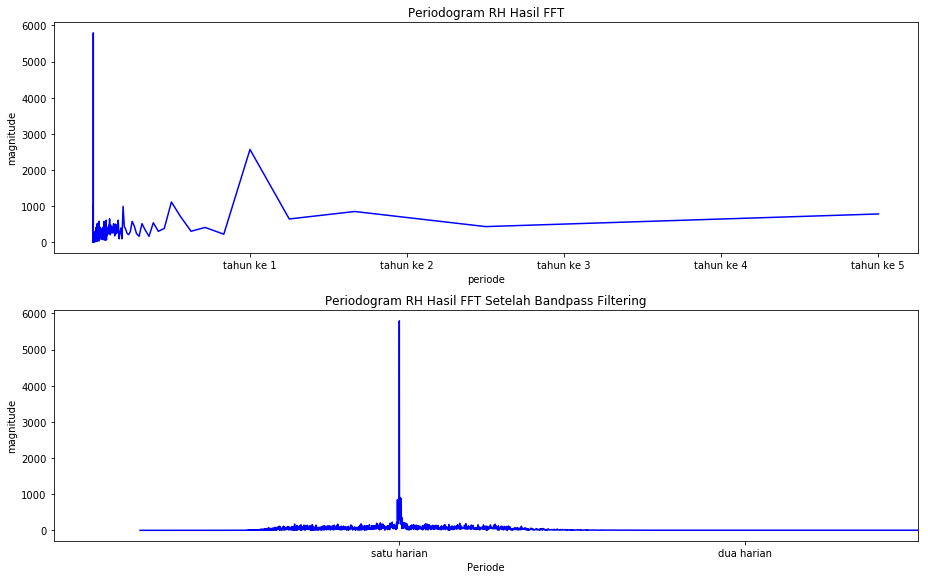

In [29]:
#Plot periodogram hasil FFT Bandpass Filtering
fig18 = plt.figure()
axRH = fig18.add_axes([0, 0, 2, 0.8])
axFrh = fig18.add_axes([0, 1, 2, 0.8])

axFrh.plot(Trh, abs(Frh_pos), 'b')
axFrh.set_xlabel('periode')
axFrh.set_ylabel('magnitude')
axFrh.set_title('Periodogram RH Hasil FFT')
#axFrh.set_xticks([5, 10, 15,  20, 25, 30, 35])
#axRH.set_xlim([0, 60])

axFrh.set_xticks([2920, 5840, 8760,  11680, 14600])
axFrh.set_xticklabels(['tahun ke 1', 'tahun ke 2' , 'tahun ke 3' , 'tahun ke 4' , 'tahun ke 5'])

axRH.plot(Trh, abs(Frh_posfiband), 'b')
axRH.set_xlabel('Periode')
axRH.set_ylabel('magnitude')
axRH.set_title('Periodogram RH Hasil FFT Setelah Bandpass Filtering')
#axRH.set_xticks([5, 10, 15,  20, 25, 30, 35])
axRH.set_xlim([0, 20])
axRH.set_xticks([8, 16])
axRH.set_xticklabels(['satu harian', 'dua harian'])

fig18

Analisis:
Dari hasil grafik diatas, grafik pertama merupakan grafik periodogram kelembaban relatif hasil FFT dan grafik kedua merupakan grafik periogdogram kelembaban relatif hasil FFT setelah dilakukan bandpass filtering untuk mendapatkan pola data harian. Dari grafik kedua, dapat dilihat setelah dilakukan bandpass filtering untuk data harian sudah tidak terdapat pengaruh dari data dengan periode kurang atau lebih dari satu hari. 

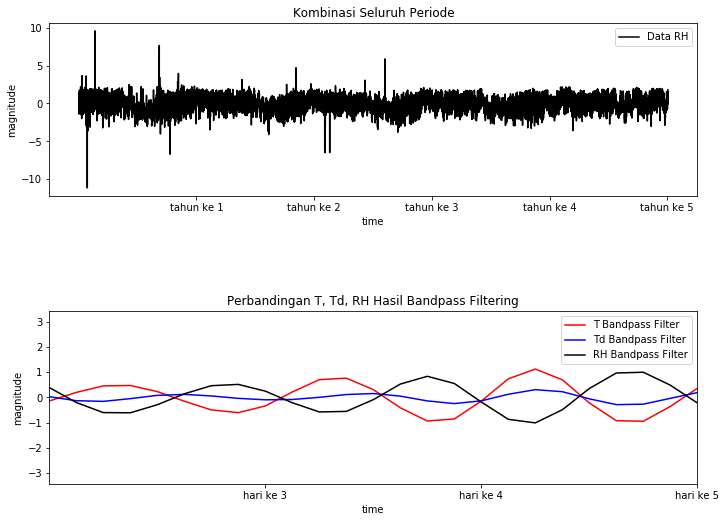

In [30]:
#Plot time series hasil Highpass Filtering RH
fig19 = plt.figure()
axRH = fig19.add_axes([0, 1, 1.5, 0.6]) 
axRHband = fig19.add_axes([0, 0, 1.5, 0.6])

axRH.plot(RH, 'k')
axRH.set_xlabel('time')
axRH.set_ylabel('magnitude')
axRH.set_title('Kombinasi Seluruh Periode')
axRH.legend(["Data RH"],loc=0)
axRH.set_xticks([2920, 5840, 8760,  11680, 14600])
axRH.set_xticklabels(['tahun ke 1', 'tahun ke 2' , 'tahun ke 3' , 'tahun ke 4' , 'tahun ke 5'])

axRHband.plot(Tfiltband, 'r')
axRHband.plot(Tdfiltband, 'b')
axRHband.plot(RHfiltband, 'k')
axRHband.set_xlabel('time')
axRHband.set_ylabel('magnitude')
axRHband.set_title('Perbandingan T, Td, RH Hasil Bandpass Filtering')
axRHband.legend(["T Bandpass Filter", "Td Bandpass Filter", "RH Bandpass Filter"],loc=0)
axRHband.set_xlim([16, 40])
axRHband.set_xticks([24,32,40])
axRHband.set_xticklabels(['hari ke 3', 'hari ke 4' , 'hari ke 5'])

fig19

Analisis:Setelah pada periodogram didapat sinyal terkuat pada periode harian, grafik diatas adalah time series untuk T, Td, dan RH setelah  Bandpass filtering yang ditunjukan dalam keterangan waktu per hari.  Dapat dilihat dengan jelas bahwa terdapat pola yang jelas dan serupa pada seluruh parameter. Terdapat satu gelombang yang terjadi dalam satu hari. Pola tersebut kemungkinan disebabkan oleh gerak semu harian matahari.


IV. Simpulan dan Saran

Kesimpulan

1.Periode yang mempengaruhi RH dan Temperatur adalah setengah harian, harian, setengah tahunan, dan tahunan. Namun fenomena yang dianalisi adalah setengah harian, harian, dan tahunan.​
2.Fenomena yang mempengaruhi RH dan temperature adalah system konveksi karena kombinasi dari sirkulasi skala sinoptik dan local (untuk setengah harian),  gerak semu harian matahari (untuk harian), serta gerak semu tahunan matahari dan monsun (untuk tahunan).​

Saran

Dalam melihat pola kejadian atau fenomena, sebaiknya menggunakan band pass agar periode yang ingin kita lihat tidak terpengaruh oleh periode lain.

V. Referensi

Hadi, T.W., Trilaksono, N.J. dan Junnaedhi, I.D.G. (2006): A Numerical Study of The Jakarta Flood Event of January/February 2002: Simulation of Convective Rainfall Using Regional Weather Model, ITB, Bandung.

Trilaksono, N.J., Otsuka, S. dan Yoden, S. (2012): A Time-Lagged Ensemble Simulation on the Modulation of Precipitation over West Java in January–February 2007, Monthly Weather Review, 140, 601-616.

http://hanif-roikhatul-fst12.web.unair.ac.id/artikel_detail-137516-FISIKA%20KOMPUTASI%202015-FAST%20FOURIER%20TRANSFORM.html

http://www.landasanteori.com/2015/10/pengertian-transformasi-fourier-diskrit.html
